In [34]:
from pyspark.sql import SparkSession, catalog


import getpass
username = getpass.getuser()

spark = SparkSession. \
    builder. \
    config('spark.ui.port', '0'). \
    config("spark.sql.warehouse.dir", f"/user/{username}/warehouse"). \
    enableHiveSupport(). \
    appName(f'{username} | Bikewise'). \
    master('yarn'). \
    getOrCreate()

In [24]:
# spark.sql(f'drop database if exists {username}_bikewise_raw cascade')

""


In [25]:
# spark.sql(f'drop database if exists {username}_bikewise_initial cascade')

""


In [26]:
# spark.sql(f'drop database if exists {username}_bikewise_final cascade')

""


In [35]:
%%sh

hdfs dfs -ls /user/${USER}/warehouse/

Found 9 items
drwxr-xr-x   - itv000579 supergroup          0 2021-06-22 16:01 /user/itv000579/warehouse/itv000579_airtraffic.db
drwxr-xr-x   - itv000579 supergroup          0 2021-07-01 01:57 /user/itv000579/warehouse/itv000579_bikewise_final.db
drwxr-xr-x   - itv000579 supergroup          0 2021-07-01 01:57 /user/itv000579/warehouse/itv000579_bikewise_initial.db
drwxr-xr-x   - itv000579 supergroup          0 2021-07-01 01:57 /user/itv000579/warehouse/itv000579_bikewise_raw.db
drwxr-xr-x   - itv000579 supergroup          0 2021-06-26 05:44 /user/itv000579/warehouse/itv000579_demo.db
drwxr-xr-x   - itv000579 supergroup          0 2021-06-28 03:10 /user/itv000579/warehouse/itv000579_hr.db
drwxr-xr-x   - itv000579 supergroup          0 2021-06-22 15:56 /user/itv000579/warehouse/itv000579_hr_db.db
drwxr-xr-x   - itv000579 supergroup          0 2021-06-26 00:49 /user/itv000579/warehouse/itv000579_nyse.db
drwxr-xr-x   - itv000579 supergroup          0 2021-06-27 15:40 /user/itv000579/warehou

In [28]:
# %%sh

# hdfs dfs -rm -r -skipTrash /user/${USER}/bikewise/raw/

Deleted /user/itv000579/bikewise/raw


In [29]:
# %%sh

# hdfs dfs -rm -r -skipTrash /user/${USER}/bikewise/initial/

Deleted /user/itv000579/bikewise/initial


In [31]:
# %%sh

# hdfs dfs -rm -r -skipTrash /user/${USER}/bikewise/final/

In [36]:
%%sh

hdfs dfs -ls -R /user/${USER}/bikewise/

drwxr-xr-x   - itv000579 supergroup          0 2021-07-01 01:57 /user/itv000579/bikewise/final
drwxr-xr-x   - itv000579 supergroup          0 2021-07-01 01:57 /user/itv000579/bikewise/initial
drwxr-xr-x   - itv000579 supergroup          0 2021-07-01 01:57 /user/itv000579/bikewise/initial/2021-07-01
-rw-r--r--   3 itv000579 supergroup          0 2021-07-01 01:57 /user/itv000579/bikewise/initial/2021-07-01/_SUCCESS
-rw-r--r--   3 itv000579 supergroup       5159 2021-07-01 01:57 /user/itv000579/bikewise/initial/2021-07-01/part-00000-40f15092-8902-4fa0-8ce8-cfb395d077a4-c000.json
drwxr-xr-x   - itv000579 supergroup          0 2021-07-01 01:57 /user/itv000579/bikewise/raw
drwxr-xr-x   - itv000579 supergroup          0 2021-07-01 01:57 /user/itv000579/bikewise/raw/2021-07-01
-rw-r--r--   3 itv000579 supergroup      11082 2021-07-01 01:57 /user/itv000579/bikewise/raw/2021-07-01/2021-07-01.json


In [ ]:
# from pyspark.sql.functions import *

In [ ]:
# df = spark. \
#     read. \
#     json(f'/user/{username}/bikewise/raw/2021-06-30/2021-06-30.json'). \
#     withColumn('day', lit(29))

In [ ]:
# df

In [ ]:
# %%sh

# hdfs dfs -mkdir -p /user/${USER}/bikewise/raw/

In [ ]:
# %%sh

# hdfs dfs -ls -R /user/${USER}/warehouse/${USER}_bikewise_raw.db

In [37]:
spark.sql(f'show partitions {username}_bikewise_raw.incidents_raw').show(truncate = False)

+-------------------------+
|partition                |
+-------------------------+
|year=2021/month=07/day=01|
+-------------------------+



In [38]:
spark.sql(f'select count(*) from {username}_bikewise_raw.incidents_raw')

count(1)
8


In [ ]:
# spark.sql(f'select * from {username}_bikewise_raw.incidents_raw')

In [ ]:
# %%sh

# hdfs dfs -rm -R -skipTrash /user/${USER}/warehouse/${USER}_bikewise_raw.db/incidents_raw

In [ ]:
# %%sh

# hdfs dfs -rm -r -skipTrash /user/${USER}/bikewise/initial/

In [39]:
%%sh

hdfs dfs -ls -R /user/${USER}/warehouse/${USER}_bikewise_initial.db

drwxr-xr-x   - itv000579 supergroup          0 2021-07-01 01:57 /user/itv000579/warehouse/itv000579_bikewise_initial.db/incidents_initial
-rw-r--r--   3 itv000579 supergroup          0 2021-07-01 01:57 /user/itv000579/warehouse/itv000579_bikewise_initial.db/incidents_initial/_SUCCESS
drwxr-xr-x   - itv000579 supergroup          0 2021-07-01 01:57 /user/itv000579/warehouse/itv000579_bikewise_initial.db/incidents_initial/year=2021
drwxr-xr-x   - itv000579 supergroup          0 2021-07-01 01:57 /user/itv000579/warehouse/itv000579_bikewise_initial.db/incidents_initial/year=2021/month=07
drwxr-xr-x   - itv000579 supergroup          0 2021-07-01 01:57 /user/itv000579/warehouse/itv000579_bikewise_initial.db/incidents_initial/year=2021/month=07/day=01
-rw-r--r--   3 itv000579 supergroup       6234 2021-07-01 01:57 /user/itv000579/warehouse/itv000579_bikewise_initial.db/incidents_initial/year=2021/month=07/day=01/part-00000-1e1edbe9-2b47-40df-ba03-7675869ba5cf.c000.snappy.parquet


In [40]:
spark.sql(f'show partitions {username}_bikewise_initial.incidents_initial').show(truncate = False)

+-------------------------+
|partition                |
+-------------------------+
|year=2021/month=07/day=01|
+-------------------------+



In [41]:
spark.sql(f'select count(*) from {username}_bikewise_initial.incidents_initial')

count(1)
8


In [42]:
spark.sql(f'select * from {username}_bikewise_initial.incidents_initial')

id,type,title,description,location_type,location_description,image_url,occurred_at,updated_at,type_properties,year,month,day
144514,Hazard,Shared Scooter or...,Scooter locked to...,null,null,https://seeclickf...,1625111502,1625117273,null,2021,07,01
144515,Hazard,Shared Scooter or...,Heard the screami...,null,null,https://seeclickf...,1625111051,1625117273,null,2021,07,01
144516,Hazard,Shared Scooter or...,Scooter leaning o...,null,null,https://seeclickf...,1625110585,1625118058,null,2021,07,01
144513,Hazard,Shared Scooter or...,Four scooters loc...,null,null,https://seeclickf...,1625109544,1625112893,null,2021,07,01
144446,Theft,Stolen 2020 Firef...,Male snuck up and...,null,null,https://files.bik...,1625106000,1625074007,null,2021,07,01
144511,Unconfirmed,Other,bike on sidewalk....,null,null,https://seeclickf...,1625105199,1625110071,null,2021,07,01
144512,Unconfirmed,Suspected Illegal...,Second level stai...,null,null,https://seeclickf...,1625104983,1625110859,null,2021,07,01
144510,Hazard,Illegal Vehicle o...,Dirt bikes and ot...,null,null,null,1625100461,1625108026,null,2021,07,01


In [ ]:
# %%sh

# hdfs dfs -rm -r -skipTrash /user/${USER}/bikewise/final/

In [ ]:
# %%sh

# hdfs dfs -ls -R /user/${USER}/warehouse/${USER}_bikewise_final.db

In [ ]:
spark.sql(f'show partitions {username}_bikewise_final.incidents_final').show(truncate = False)

In [ ]:
spark.sql(f'select count(*) from {username}_bikewise_final.incidents_final')

In [ ]:
# %%sh

# hdfs dfs -ls -R /user/${USER}/${USER}_testing

# testing for final db and use cases

In [10]:
from pyspark.sql.functions import *

In [11]:
df_graph = spark.read.table(f'{username}_bikewise_initial.incidents_initial')

In [12]:
df = df_graph. \
select('id', 'type', 'occurred_at'). \
withColumn("incident_date", from_unixtime('occurred_at', "yyyy-MM-dd")). \
groupBy(col('type')).\
count()

In [13]:
df

type,count
Hazard,14
Theft,4
Unconfirmed,5


In [14]:
df = df.select(col('type'), col('count').alias('number'))

In [15]:
df

type,number
Hazard,14
Theft,4
Unconfirmed,5


In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# import numpy as np

In [17]:
new_df = df.toPandas()

In [18]:
new_df

,type,number
0,Hazard,14
1,Theft,4
2,Unconfirmed,5


In [19]:


# x = [val.type for val in df.select('type').collect()]
# y = [val.number for val in df.select('number').collect()]

In [20]:
# x

In [21]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])

# ax.bar(x,y,width = 0.3)
# ax.set_ylabel('Count')
# ax.set_title('Count by incident type')
# ax.legend(labels = x, loc='upper right')
# plt.show()

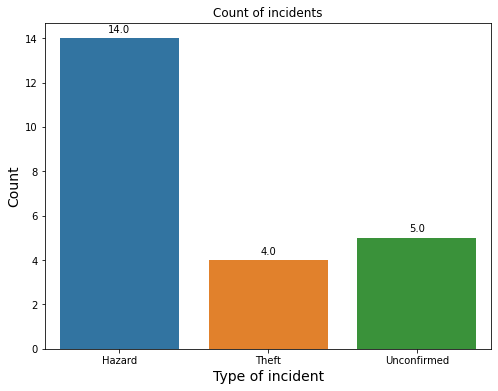

In [22]:
plt.figure(figsize=(8, 6))
splot=sns.barplot(x="type",y="number",data=new_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Type of incident", size=14)
plt.ylabel("Count", size=14)
plt.title("Count of incidents")
plt.savefig("Seaborn_Python.pdf")
